## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
from keras.layers import BatchNormalization

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256, 1024]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for batch_sz in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Batch_size: %d" % batch_sz)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=batch_sz,
              validation_data=(x_test, y_test),
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch_size-%s" % str(batch_sz)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0725 14:48:31.747238 13320 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0725 14:48:31.748236 13320 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 14:48:31.760203 13320 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 14:48:31.760203 13320 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 14:48:31.762198 13

Experiment with Batch_size: 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)      

W0725 14:48:32.034606 13320 deprecation.py:323] From D:\Anaconda3\envs\keras37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 126s 3ms/step - loss: 2.3075 - acc: 0.1474 - val_loss: 2.1685 - val_acc: 0.2208
Epoch 2/50
50000/50000 [==============================] - 121s 2ms/step - loss: 2.2311 - acc: 0.1683 - val_loss: 2.1526 - val_acc: 0.2303
Epoch 3/50
50000/50000 [==============================] - 122s 2ms/step - loss: 2.2300 - acc: 0.1684 - val_loss: 2.1785 - val_acc: 0.2032
Epoch 4/50
50000/50000 [==============================] - 121s 2ms/step - loss: 2.2380 - acc: 0.1622 - val_loss: 2.3289 - val_acc: 0.2023
Epoch 5/50
50000/50000 [==============================] - 121s 2ms/step - loss: 2.2367 - acc: 0.1685 - val_loss: 2.6911 - val_acc: 0.1945
Epoch 6/50
50000/50000 [==============================] - 120s 2ms/step - loss: 2.2335 - acc: 0.1665 - val_loss: 2.7736 - val_acc: 0.2157
Epoch 7/50
50000/50000 [==============================] - 120s 2ms/step - loss: 2.2360 - acc: 0.1654 - val_loss: 2.3709 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.7928 - acc: 0.3655 - val_loss: 1.6775 - val_acc: 0.4064
Epoch 2/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.6407 - acc: 0.4167 - val_loss: 1.5531 - val_acc: 0.4419
Epoch 3/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.5877 - acc: 0.4332 - val_loss: 1.5353 - val_acc: 0.4581
Epoch 4/50
50000/50000 [==============================] - 15s 310us/step - loss: 1.5646 - acc: 0.4408 - val_loss: 1.6388 - val_acc: 0.4156
Epoch 5/50
50000/50000 [==============================] - 16s 310us/step - loss: 1.5330 - acc: 0.4553 - val_loss: 1.4967 - val_acc: 0.4705
Epoch 6/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.4932 - acc: 0.4688 - val_loss: 1.4979 - val_acc: 0.4663
Epoch 7/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.4585 - acc: 0.4842 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.7379 - acc: 0.3893 - val_loss: 1.5853 - val_acc: 0.4353
Epoch 2/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.5391 - acc: 0.4539 - val_loss: 1.5248 - val_acc: 0.4577
Epoch 3/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.4665 - acc: 0.4809 - val_loss: 1.4886 - val_acc: 0.4635
Epoch 4/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4158 - acc: 0.4986 - val_loss: 1.4605 - val_acc: 0.4803
Epoch 5/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.3716 - acc: 0.5139 - val_loss: 1.4363 - val_acc: 0.4887
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3475 - acc: 0.5227 - val_loss: 1.4655 - val_acc: 0.4795
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.3145 - acc: 0.5335 - val_loss: 1.5459 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7747 - acc: 0.3838 - val_loss: 1.6937 - val_acc: 0.3930
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4908 - acc: 0.4744 - val_loss: 1.5787 - val_acc: 0.4466
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3914 - acc: 0.5125 - val_loss: 1.4930 - val_acc: 0.4707
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3139 - acc: 0.5382 - val_loss: 1.5090 - val_acc: 0.4655
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.2590 - acc: 0.5608 - val_loss: 1.5937 - val_acc: 0.4451
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.2080 - acc: 0.5768 - val_loss: 1.4394 - val_acc: 0.4886
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.1607 - acc: 0.5942 - val_loss: 1.4845 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.8544 - acc: 0.3664 - val_loss: 1.7440 - val_acc: 0.3938
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5396 - acc: 0.4587 - val_loss: 1.6055 - val_acc: 0.4391
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4402 - acc: 0.4937 - val_loss: 1.5630 - val_acc: 0.4477
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.3680 - acc: 0.5191 - val_loss: 1.5124 - val_acc: 0.4563
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3115 - acc: 0.5400 - val_loss: 1.4880 - val_acc: 0.4748
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2578 - acc: 0.5602 - val_loss: 1.4702 - val_acc: 0.4870
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2137 - acc: 0.5775 - val_loss: 1.4700 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 35us/step - loss: 2.1829 - acc: 0.2783 - val_loss: 2.0783 - val_acc: 0.3343
Epoch 2/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.7379 - acc: 0.3934 - val_loss: 1.8696 - val_acc: 0.3728
Epoch 3/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.6133 - acc: 0.4357 - val_loss: 1.7012 - val_acc: 0.4094
Epoch 4/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.5393 - acc: 0.4621 - val_loss: 1.6335 - val_acc: 0.4286
Epoch 5/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.4858 - acc: 0.4819 - val_loss: 1.5939 - val_acc: 0.4366
Epoch 6/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.4406 - acc: 0.4959 - val_loss: 1.5663 - val_acc: 0.4531
Epoch 7/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.4007 - acc: 0.5130 - val_loss: 1.5652 - val_acc

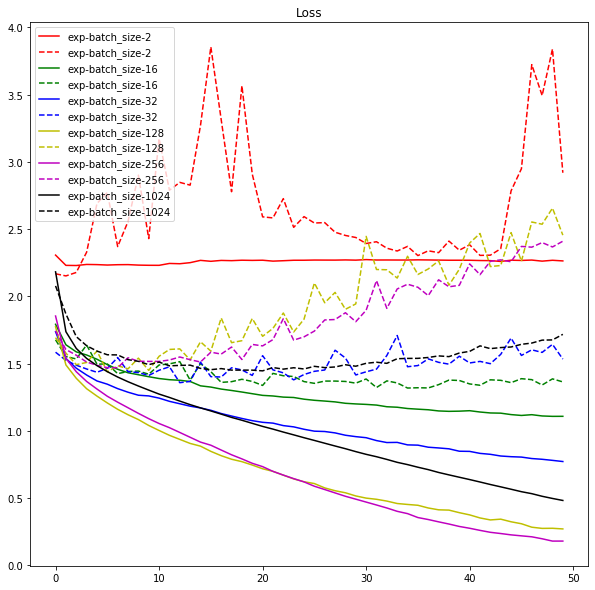

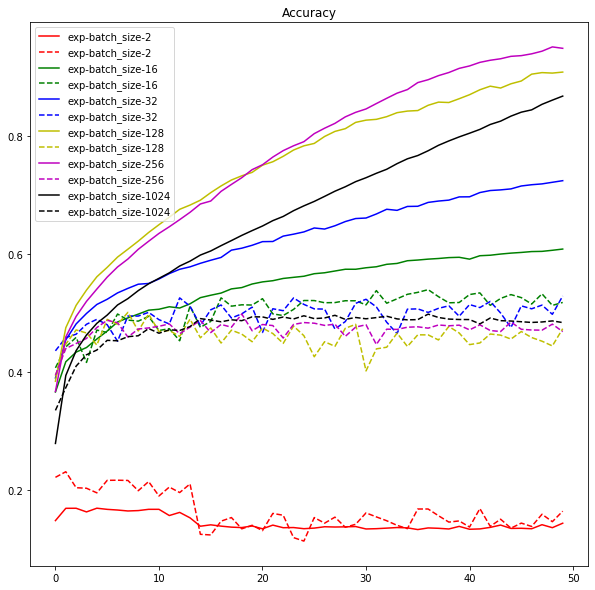

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
             
plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], "--", label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### 結果討論

1. Batch size大小差異:

   (1) Batch size越小，執行時間越長

   (2) 當Batch size為2時，效果最差，不僅耗時，accuracy也最低

   (3) 當Batch size為16時，效果最好，valid data得到的accuracy最高約0.53
   
   
2. BN的放置位置比較:

   (1) BN放在Activation之前: valid data會有梯度爆炸的問題
   
   (2) BN放在Input layer之後: valid data比較不會有梯度爆炸的問題
   
   